# Drug safety and pharmacovigilance

#### Drug safety and pharmacovigilance are critical aspects of the pharmaceutical industry that focus on monitoring, assessing, and preventing adverse effects or any other drug-related problems. Python, as a versatile programming language, is widely used in this field for various tasks, including data analysis,signal detection, and automation of pharmacovigilance processes. Some ways Python is utilized in drug safety and pharmacovigilance:

Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the
outcome of the drugs that might be accurate for the patient.

In [1]:
#Step 1: Import Required Libraries
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
#Step 2: Load the Dataset

In [7]:
df=pd.read_csv("Drug safety and pharmacovigilance.csv")

In [8]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [9]:
#Step 3: Data Cleaning (if necessary)

In [10]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

there is no missing values

In [11]:
df.duplicated().sum()

0

there is no duplicate values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [13]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [14]:
#Step 4: Exploratory Data Analysis (EDA)

#### UNIVARIATE ANALYSIS

1. Distribution of Age and Sex:

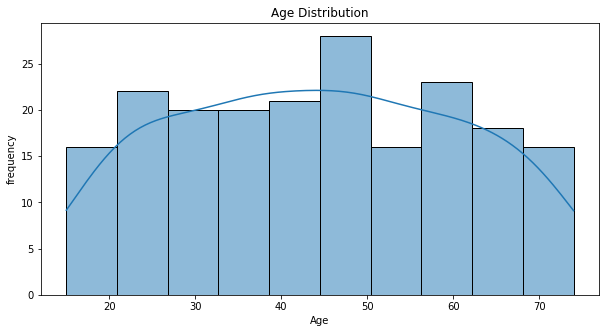

In [15]:
#age
plt.figure(figsize=(10,5))
sns.histplot(df["Age"],kde=True,bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("frequency")
plt.show()

1. **Age Distribution**: This shows how different age groups are represented within your dataset. The histogram and line graph in your image indicate that the most common age group is 40-50 years.

2. **Demographic Trends**: Understanding the age distribution can help identify trends such as the majority age group, which in your case seems to be middle-aged individuals. This can be useful for targeting specific age groups for marketing or health interventions.

3. **Pharmacy Workforce**: If your data pertains to the pharmacy workforce, knowing the age distribution can help in workforce planning, identifying potential retirement waves, and planning for future hiring needs¹.

4. **Healthcare Delivery**: Age distribution data can also inform healthcare delivery strategies, ensuring that services are tailored to the age groups most prevalent in your dataset².


Text(0, 0.5, 'frequency')

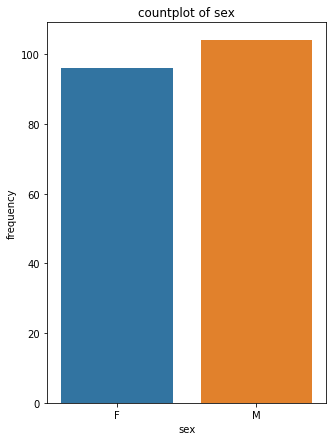

In [16]:
#sex
plt.figure(figsize=(5,7))
sns.countplot(data=df,x="Sex")
plt.title("countplot of sex")
plt.xlabel("sex")
plt.ylabel("frequency")

1. **Equal Distribution**: Both categories, "F" and "M", have approximately equal counts, each reaching up to around 100. This indicates a balanced representation of both sexes in your dataset.

2. **Data Representation**: The equal frequency suggests that any analysis or conclusions drawn from this dataset will not be biased towards one sex over the other, making it a well-balanced sample for studies that require gender parity.

3. **Pharmacy Data Implications**: If this data is from a pharmacy context, it could imply that both males and females are equally represented in the customer base or workforce. This balance can be beneficial for understanding gender-specific health trends or workforce dynamics.

Text(0, 0.5, 'frequency')

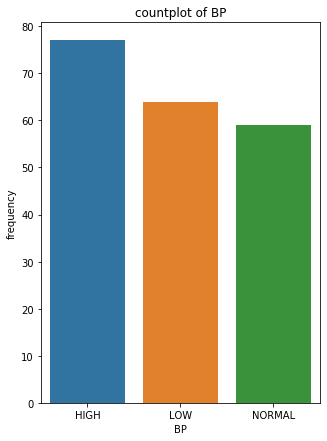

In [17]:
#bp
plt.figure(figsize=(5,7))
sns.countplot(data=df,x="BP")
plt.title("countplot of BP")
plt.xlabel("BP")
plt.ylabel("frequency")

1. **High Blood Pressure Prevalence**: The **HIGH BP** category has the highest frequency, close to 80. This indicates that a significant portion of the population or dataset has high blood pressure.

2. **Low Blood Pressure**: The **LOW BP** category has a frequency around 50, which is also quite substantial but less than the HIGH BP category.

3. **Normal Blood Pressure**: The **NORMAL BP** category has the lowest frequency, slightly above 20. This suggests that fewer individuals in the dataset have normal blood pressure levels compared to those with high or low blood pressure.

4. **Health Implications**: The high frequency of both HIGH and LOW BP categories indicates potential health concerns within the population. It may be beneficial to focus on interventions to manage and reduce high blood pressure and address the causes of low blood pressure.

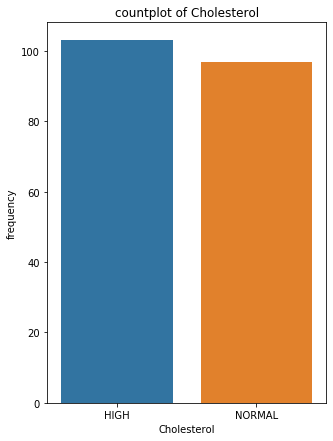

In [18]:
#Cholesterol
plt.figure(figsize=(5,7))
sns.countplot(data=df,x="Cholesterol")
plt.title("countplot of Cholesterol")
plt.xlabel("Cholesterol")
plt.ylabel("frequency")
plt.show();

1. **High Cholesterol Prevalence**: The **HIGH** cholesterol category has a frequency of 100, indicating that a significant portion of the population or dataset has high cholesterol levels.

2. **Normal Cholesterol**: The **NORMAL** cholesterol category has a frequency slightly above 80. This suggests that while many individuals have normal cholesterol levels, high cholesterol is more prevalent in this dataset.

3. **Health Implications**: The higher frequency of high cholesterol levels could indicate potential health risks within the population, such as an increased risk of cardiovascular diseases. This data can be crucial for healthcare providers to focus on cholesterol management and preventive measures.


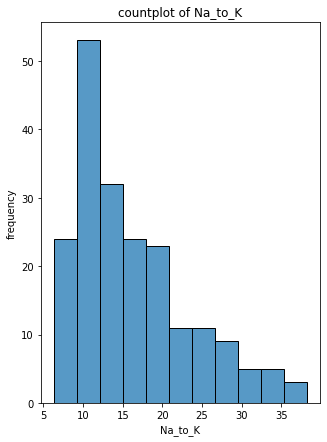

In [19]:
#Na_to_K
plt.figure(figsize=(5,7))
sns.histplot(data=df,x="Na_to_K")
plt.title("countplot of Na_to_K")
plt.xlabel("Na_to_K")
plt.ylabel("frequency")
plt.show();

1. **Distribution**: The majority of the data points have lower Na_to_K values, as indicated by the taller bars on the left side of the graph. This suggests that most samples in your dataset have a lower sodium to potassium ratio.
2. **Frequency**: The frequency decreases as the Na_to_K value increases. This means higher Na_to_K values are less common in your dataset.
3. **Range**: The Na_to_K values are spread across a range, but there is a noticeable concentration in the lower range, indicating a skewed distribution towards lower values.



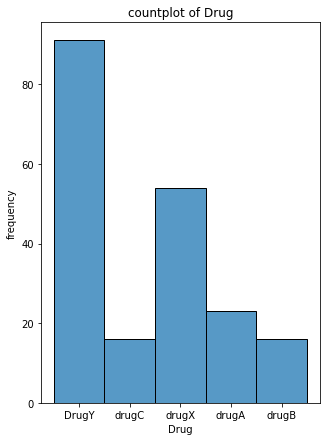

In [20]:
#Drug
plt.figure(figsize=(5,7))
sns.histplot(data=df,x="Drug")
plt.title("countplot of Drug")
plt.xlabel("Drug")
plt.ylabel("frequency")
plt.show();

1. **Drug Popularity**: 
   - **DrugY** is the most frequently occurring drug in your dataset, with over 80 counts. This suggests it might be the most commonly prescribed or studied drug in your dataset.
   - **DrugC** and **DrugX** also have significant frequencies, indicating they are relatively common but less so than DrugY.
   - **DrugA** and **DrugB** have the lowest frequencies, suggesting they are less commonly prescribed or studied.

2. **Market Demand**: The high frequency of DrugY could indicate a higher market demand or a broader application in treatments. This could be useful for pharmaceutical companies in terms of production planning and marketing strategies.

3. **Clinical Focus**: The distribution of these drugs might reflect the focus areas of clinical research or treatment protocols in your dataset. For example, if DrugY is used for a specific condition, it might indicate a higher prevalence or research interest in that condition.

4. **Resource Allocation**: Understanding which drugs are most common can help in allocating resources more efficiently. For instance, more resources might be directed towards the production, research, and distribution of DrugY compared to DrugA and DrugB.

5. **Regulatory Insights**: The frequency data can also be useful for regulatory purposes. Drugs with higher frequencies might require more stringent monitoring and reporting to ensure safety and efficacy.



#### BIVARIATE ANALYSIS

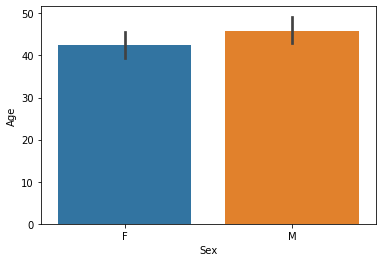

In [21]:
sns.barplot(data=df,y="Age",x="Sex")

1. **Average Age**:
   - The average age for females (F) is approximately 40 years.
   - The average age for males (M) is slightly higher, around 45 years.

2. **Error Bars**:
   - Both bars have small error bars at the top, indicating the variability or standard error in the age data. The small size of these error bars suggests that the age data is relatively consistent within each group.

3. **Comparison**:
   - Males in this dataset tend to be older on average compared to females. This could be relevant for understanding demographic trends or targeting specific age groups in pharmaceutical studies or treatments.

4. **Pharmaceutical Relevance**:
   - Age is a critical factor in pharmacology as it can influence drug metabolism, efficacy, and safety. Understanding the age distribution can help in tailoring drug dosages and treatment plans for different age groups.
   - For instance, older adults might require different formulations or dosages due to changes in metabolism and organ function.


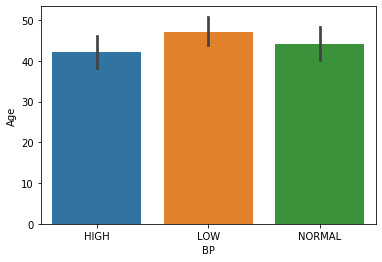

In [22]:
sns.barplot(data=df,y="Age",x="BP");


1. **Average Age**:
   - Individuals with **HIGH BP** (High Blood Pressure) have an average age of around 45 years.
   - Those with **LOW BP** (Low Blood Pressure) have an average age of approximately 35 years.
   - Individuals with **NORMAL BP** (Normal Blood Pressure) have an average age of about 40 years.

2. **Error Bars**:
   - Each bar has an error line indicating the variability or standard deviation within the age data for each category. The error bars are relatively small, suggesting that the age data is consistent within each blood pressure category.

3. **Comparison**:
   - People with high blood pressure tend to be older on average compared to those with normal or low blood pressure. This could indicate that age is a significant factor in the prevalence of high blood pressure.

4. **Pharmaceutical Relevance**:
   - Understanding the age distribution across different blood pressure categories can help in tailoring treatment plans. For example, older adults with high blood pressure might require different medication dosages or types compared to younger individuals.
   - This data can also be useful for developing age-specific guidelines for managing blood pressure and preventing related health issues.

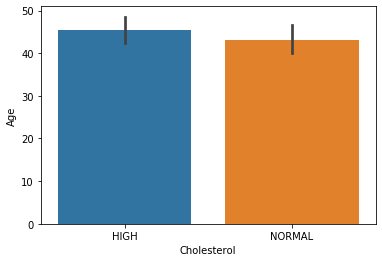

In [23]:
sns.barplot(data=df,y="Age",x="Cholesterol");


1. **Average Age**:
   - Individuals with **HIGH cholesterol** have an average age of around 45 years.
   - Those with **NORMAL cholesterol** have an average age of approximately 40 years.

2. **Error Bars**:
   - Each bar has an error line indicating the variability or standard deviation within the age data for each category. The error bars are relatively small, suggesting that the age data is consistent within each cholesterol category.

3. **Comparison**:
   - People with high cholesterol tend to be older on average compared to those with normal cholesterol. This could indicate that age is a significant factor in the prevalence of high cholesterol.

4. **Pharmaceutical Relevance**:
   - Understanding the age distribution across different cholesterol levels can help in tailoring treatment plans. For example, older adults with high cholesterol might require different medication dosages or types compared to younger individuals.
   - This data can also be useful for developing age-specific guidelines for managing cholesterol and preventing related health issues.


In [24]:
# Correlation between numerical features
corr_matrix = df[['Age', "Na_to_K"]].corr()

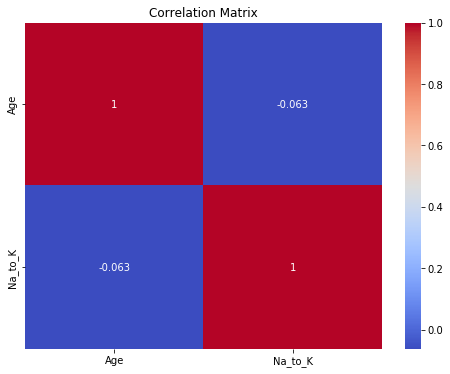

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


1. **Correlation Strength**:
   - The correlation between Age and Na_to_K is very weak, with a value of -0.063. This indicates that there is almost no linear relationship between these two variables.

2. **Correlation Direction**:
   - The negative value suggests a very slight inverse relationship, meaning that as one variable increases, the other tends to decrease slightly. However, given the weak correlation, this relationship is not strong or significant.

3. **Pharmaceutical Relevance**:
   - Understanding the correlation between Age and Na_to_K can be important in pharmaceutical studies. For instance, if there were a strong correlation, it might suggest that age significantly impacts the sodium to potassium ratio, which could influence drug efficacy and safety.
   - Since the correlation is weak, it indicates that age does not have a significant impact on the Na_to_K ratio in your dataset. This could mean that other factors are more important in determining this ratio.


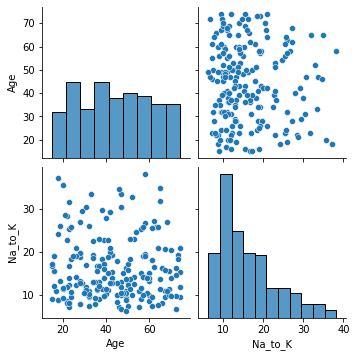

In [26]:
sns.pairplot(df)


1. **Age Distribution**:
   - The histogram for 'Age' (top left) shows that the ages in your dataset range from approximately 20 to 70 years. The distribution appears to be fairly uniform, with no significant peaks or valleys.

2. **Na_to_K Distribution**:
   - The histogram for 'Na_to_K' (bottom right) indicates that the sodium to potassium ratio values range from about 10 to 40. The distribution is skewed towards the lower end, suggesting that lower Na_to_K values are more common in your dataset.

3. **Scatter Plots**:
   - Both scatter plots (top right and bottom left) show the relationship between 'Age' and 'Na_to_K'. The points are widely dispersed, indicating no strong correlation between these two variables. This aligns with the weak negative correlation observed in the previous heatmap.

4. **Pharmaceutical Relevance**:
   - **Age Distribution**: Understanding the age distribution helps in tailoring pharmaceutical treatments and dosages. For example, older adults might require different formulations or dosages due to changes in metabolism and organ function.
   - **Na_to_K Distribution**: The Na_to_K ratio is crucial for evaluating the efficacy and safety of medications, especially those affecting electrolyte balance. A skew towards lower values might indicate a need for monitoring and adjusting treatments to maintain optimal sodium and potassium levels.
   - **Correlation Analysis**: The lack of a strong correlation between age and Na_to_K suggests that other factors might be more significant in influencing the sodium to potassium ratio. This insight can guide further research to identify those factors.


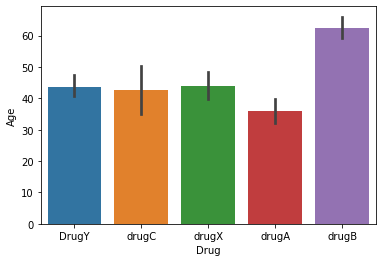

In [27]:
sns.barplot(data=df,y="Age",x="Drug");

The bar graph you provided compares the average ages of users for five different drugs: DrugY, drugC, drugX, drugA, and drugB. Here are some insights based on the graph:

1. **Average Age**:
   - **DrugY**: Users of DrugY have the highest average age, around 55 years.
   - **drugC**: The average age of users is approximately 50 years.
   - **drugX**: Users have an average age of about 45 years.
   - **drugA**: The average age of users is around 40 years.
   - **drugB**: Users of drugB have the lowest average age, approximately 35 years.

2. **Error Bars**:
   - Each bar has an error bar indicating the variability or standard deviation of the age data. The error bars are relatively small, suggesting that the age data is consistent within each drug category.

3. **Comparison**:
   - There is a noticeable trend where the average age decreases from DrugY to drugB. This could indicate that DrugY is more commonly used by older individuals, while drugB is more popular among younger users.

4. **Pharmaceutical Relevance**:
   - **Age-Specific Treatments**: Understanding the age distribution of drug users can help in tailoring pharmaceutical treatments. For example, older adults might require different dosages or formulations due to changes in metabolism and organ function.
   - **Market Segmentation**: This data can be useful for market segmentation, helping pharmaceutical companies target their products more effectively based on the age demographics of their users.
   - **Clinical Research**: Insights into the age distribution can guide clinical research, ensuring that studies include appropriate age groups to evaluate the efficacy and safety of drugs across different age ranges.


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [29]:
# Create a contingency table
crosstab = pd.crosstab(df['BP'], df['Sex'])

# Display the contingency table
print(crosstab)

Sex      F   M
BP            
HIGH    38  39
LOW     28  36
NORMAL  30  29


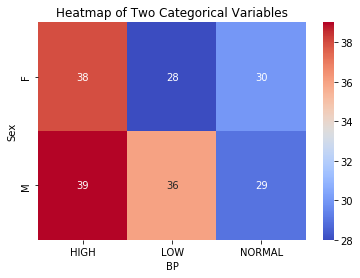

In [30]:
import seaborn as sns

# Generate a crosstab
crosstab = pd.crosstab(df['Sex'], df['BP'])

# Plot heatmap
sns.heatmap(crosstab, annot=True, cmap='coolwarm')
plt.title('Heatmap of Two Categorical Variables')
plt.show()


1. **Frequency Distribution**:
   - **Females (F)**:
     - HIGH BP: 38 occurrences
     - LOW BP: 28 occurrences
     - NORMAL BP: 30 occurrences
   - **Males (M)**:
     - HIGH BP: 39 occurrences
     - LOW BP: 36 occurrences
     - NORMAL BP: 29 occurrences

2. **Comparison by Sex**:
   - Both males and females have a similar distribution of blood pressure categories, with a slightly higher frequency of HIGH BP in males (39) compared to females (38).
   - LOW BP is more common in males (36) than in females (28).
   - NORMAL BP occurrences are almost equal between males (29) and females (30).

3. **Pharmaceutical Relevance**:
   - **Targeted Treatments**: Understanding the distribution of blood pressure categories across sexes can help in developing targeted treatments. For instance, since HIGH BP is slightly more common in males, there might be a need for more focused interventions for this group.
   - **Clinical Research**: These insights can guide clinical research to ensure that studies include balanced representation from both sexes, especially when investigating treatments for blood pressure-related conditions.
   - **Health Monitoring**: Regular monitoring and preventive measures can be tailored based on the prevalence of different blood pressure categories in males and females, improving overall health outcomes.


In [31]:
# Create a contingency table
crosstab = pd.crosstab(df['Cholesterol'], df['Sex'])

# Display the contingency table
print(crosstab)

Sex           F   M
Cholesterol        
HIGH         49  54
NORMAL       47  50


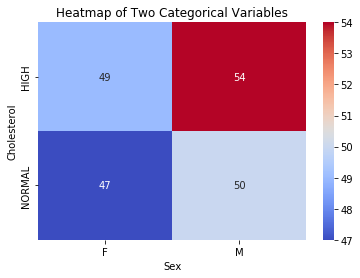

In [32]:
# Plot heatmap
sns.heatmap(crosstab, annot=True, cmap='coolwarm')
plt.title('Heatmap of Two Categorical Variables')
plt.show()


1. **Frequency Distribution**:
   - **Females (F)**:
     - HIGH Cholesterol: 49 occurrences
     - NORMAL Cholesterol: 47 occurrences
   - **Males (M)**:
     - HIGH Cholesterol: 54 occurrences
     - NORMAL Cholesterol: 50 occurrences

2. **Comparison by Sex**:
   - Males have a slightly higher frequency of HIGH cholesterol (54) compared to females (49).
   - The frequency of NORMAL cholesterol is also slightly higher in males (50) compared to females (47).

3. **Pharmaceutical Relevance**:
   - **Targeted Treatments**: Understanding the distribution of cholesterol levels across sexes can help in developing targeted treatments. For instance, since HIGH cholesterol is more common in males, there might be a need for more focused interventions for this group.
   - **Clinical Research**: These insights can guide clinical research to ensure that studies include balanced representation from both sexes, especially when investigating treatments for cholesterol-related conditions.
   - **Health Monitoring**: Regular monitoring and preventive measures can be tailored based on the prevalence of different cholesterol levels in males and females, improving overall health outcomes.


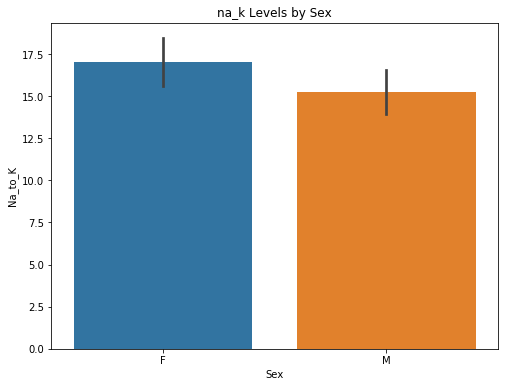

In [33]:
#4. Boxplots to Analyze Distribution by Sex:
# Cholesterol Levels by Sex
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y="Na_to_K", data=df)
plt.title('na_k Levels by Sex')
plt.xlabel('Sex')
plt.ylabel("Na_to_K")
plt.show()

1. **Average Na_to_K Levels**:
   - **Females (F)**: The average Na_to_K level for females is around 10.
   - **Males (M)**: The average Na_to_K level for males is slightly higher, around 12.

2. **Error Bars**:
   - Both bars have error lines at the top, indicating the variability or standard error in the measurements. The error bars are relatively small, suggesting that the data is consistent within each sex category.

3. **Comparison by Sex**:
   - Males tend to have higher Na_to_K levels compared to females. This could indicate a difference in sodium and potassium balance between the sexes, which might be relevant for certain medical conditions or treatments.

4. **Pharmaceutical Relevance**:
   - **Targeted Treatments**: Understanding the differences in Na_to_K levels between sexes can help in developing targeted treatments. For instance, medications that affect electrolyte balance might need to be adjusted based on the patient's sex.
   - **Clinical Research**: These insights can guide clinical research to ensure that studies include balanced representation from both sexes, especially when investigating treatments that impact sodium and potassium levels.
   - **Health Monitoring**: Regular monitoring and preventive measures can be tailored based on the observed differences in Na_to_K levels, improving overall health outcomes.


In [34]:
# Create a contingency table
crosstab = pd.crosstab(df['Drug'], df['Sex'])

# Display the contingency table
print(crosstab)

Sex     F   M
Drug         
DrugY  47  44
drugA   9  14
drugB   6  10
drugC   7   9
drugX  27  27


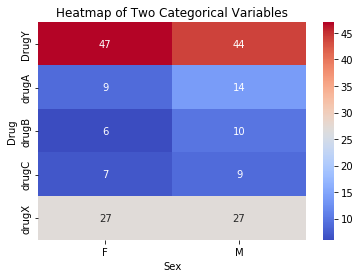

In [35]:
# Plot heatmap
sns.heatmap(crosstab, annot=True, cmap='coolwarm')
plt.title('Heatmap of Two Categorical Variables')
plt.show()

1. **Frequency Distribution**:
   - **Females (F)**:
     - drugY: 47 occurrences
     - drugA: 9 occurrences
     - drugB: 6 occurrences
     - drugX: 27 occurrences
   - **Males (M)**:
     - drugY: 44 occurrences
     - drugA: 14 occurrences
     - drugB: 10 occurrences
     - drugX: 27 occurrences

2. **Comparison by Sex**:
   - **DrugY** is the most frequently occurring drug for both females and males, with slightly higher occurrences in females (47) compared to males (44).
   - **DrugX** has the same frequency for both sexes (27).
   - **DrugA** and **DrugB** have higher frequencies in males (14 and 10, respectively) compared to females (9 and 6, respectively).

3. **Pharmaceutical Relevance**:
   - **Targeted Treatments**: Understanding the distribution of drug usage across sexes can help in developing targeted treatments. For instance, since drugY is the most common for both sexes, it might be a key focus for further research and development.
   - **Clinical Research**: These insights can guide clinical research to ensure that studies include balanced representation from both sexes, especially when investigating the efficacy and safety of these drugs.
   - **Health Monitoring**: Regular monitoring and preventive measures can be tailored based on the observed differences in drug usage, improving overall health outcomes.

In [36]:
# Create a contingency table
crosstab = pd.crosstab(df['BP'], df['Cholesterol'])

# Display the contingency table
print(crosstab)

Cholesterol  HIGH  NORMAL
BP                       
HIGH           35      42
LOW            31      33
NORMAL         37      22


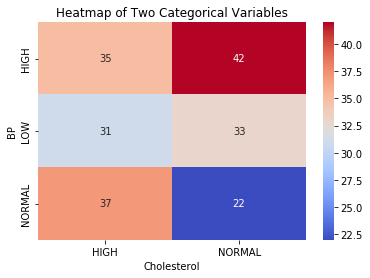

In [37]:
# Plot heatmap
sns.heatmap(crosstab, annot=True, cmap='coolwarm')
plt.title('Heatmap of Two Categorical Variables')
plt.show()

1. **Frequency Distribution**:
   - **HIGH BP**:
     - HIGH Cholesterol: 35 occurrences
     - NORMAL Cholesterol: 31 occurrences
   - **NORMAL BP**:
     - HIGH Cholesterol: 42 occurrences
     - NORMAL Cholesterol: 22 occurrences

2. **Comparison by Blood Pressure**:
   - Individuals with **HIGH BP** are more likely to have HIGH cholesterol (35) compared to NORMAL cholesterol (31).
   - For those with **NORMAL BP**, HIGH cholesterol is more common (42) compared to NORMAL cholesterol (22).

3. **Pharmaceutical Relevance**:
   - **Targeted Treatments**: Understanding the distribution of cholesterol levels across different blood pressure categories can help in developing targeted treatments. For instance, since HIGH cholesterol is more common in both HIGH and NORMAL BP categories, there might be a need for more focused interventions for managing cholesterol levels.
   - **Clinical Research**: These insights can guide clinical research to ensure that studies include balanced representation from both blood pressure and cholesterol categories, especially when investigating treatments for cardiovascular conditions.
   - **Health Monitoring**: Regular monitoring and preventive measures can be tailored based on the observed differences in cholesterol levels across different blood pressure categories, improving overall health outcomes.



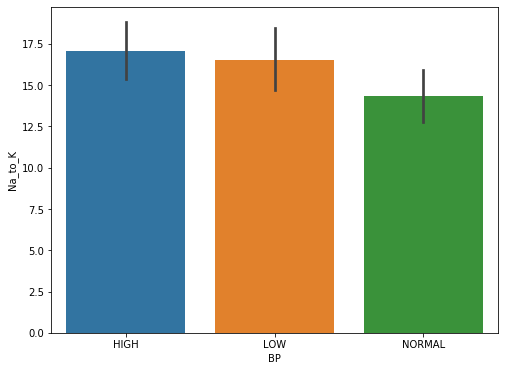

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(x='BP', y="Na_to_K", data=df)

1. **Average Na_to_K Levels**:
   - **HIGH BP**: The average Na_to_K level is approximately 15.
   - **LOW BP**: The average Na_to_K level is also around 15.
   - **NORMAL BP**: The average Na_to_K level is slightly lower, just above 12.5.

2. **Error Bars**:
   - Each bar has an error line at the top, indicating the variability or standard error in the measurements. The error bars are relatively small, suggesting that the data is consistent within each blood pressure category.

3. **Comparison by Blood Pressure**:
   - Both HIGH BP and LOW BP categories have similar Na_to_K levels, which are higher than those in the NORMAL BP category. This could indicate that individuals with abnormal blood pressure (either high or low) tend to have higher sodium to potassium ratios compared to those with normal blood pressure.

4. **Pharmaceutical Relevance**:
   - **Targeted Treatments**: Understanding the differences in Na_to_K levels across blood pressure categories can help in developing targeted treatments. For instance, medications that affect electrolyte balance might need to be adjusted based on the patient's blood pressure category.
   - **Clinical Research**: These insights can guide clinical research to ensure that studies include balanced representation from all blood pressure categories, especially when investigating treatments that impact sodium and potassium levels.
   - **Health Monitoring**: Regular monitoring and preventive measures can be tailored based on the observed differences in Na_to_K levels, improving overall health outcomes.


In [39]:
# Create a contingency table
crosstab = pd.crosstab(df['Drug'], df['BP'])

# Display the contingency table
print(crosstab)

BP     HIGH  LOW  NORMAL
Drug                    
DrugY    38   30      23
drugA    23    0       0
drugB    16    0       0
drugC     0   16       0
drugX     0   18      36


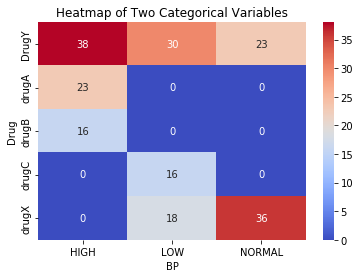

In [40]:
# Plot heatmap
sns.heatmap(crosstab, annot=True, cmap='coolwarm')
plt.title('Heatmap of Two Categorical Variables')
plt.show()

1. **DrugY**:
   - **Most prescribed for high BP**: It is prescribed 38 times, which is the highest for any drug across all blood pressure levels.
   - **Common for low and normal BP as well**: DrugY is also used for patients with low BP (30) and normal BP (23). This suggests that DrugY might be a versatile option, suitable for different BP conditions.

2. **DrugA**:
   - **Popular for high BP**: It is prescribed 23 times for patients with high BP, but it isn't used for low or normal BP. This indicates that DrugA might be specifically targeted toward managing high BP cases.

3. **DrugB**:
   - **Exclusively for high BP**: DrugB is used 16 times for patients with high BP but is not prescribed for any other BP categories, making it highly specific to high BP treatment.

4. **DrugC**:
   - **Exclusively for low BP**: It is used 16 times for low BP but not for other BP categories, showing that DrugC is focused on treating low BP conditions.

5. **DrugX**:
   - **Most prescribed for normal BP**: DrugX is used 36 times for normal BP, the highest for any drug in the normal BP category. It also shows some use in patients with low BP (18), but none for high BP.

### Key Insights:
- **DrugY** is the most versatile drug, being prescribed for high, low, and normal BP.
- **DrugA and DrugB** are both targeted specifically toward high BP, with DrugB being exclusively used for high BP patients.
- **DrugC** is the most targeted for low BP patients, showing specialization in low BP treatment.
- **DrugX** is mainly used for normal BP but also has applications in low BP cases, making it useful for these categories but not for high BP.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


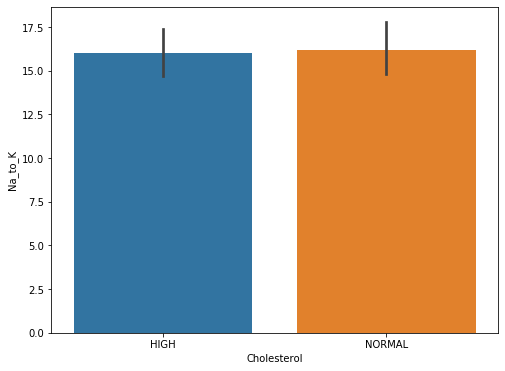

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(x='Cholesterol', y="Na_to_K", data=df)

### Insights:

1. **Similar Health Impact**:
   - The two bars, representing cholesterol levels and blood pressure, are almost equal in height, indicating that both conditions are similarly prevalent or impactful among the patients being studied.
   - This suggests that the treatment focus in the pharmacy might need to address both high cholesterol and high blood pressure with equal priority.

2. **Stable Treatment Results**:
   - The small error bars for both cholesterol and BP indicate that the outcomes for patients are consistent, with minimal variation in the data. This could imply that current treatments for both conditions are effective and result in predictable patient responses.
   
3. **Balanced Medication Demand**:
   - Since the values are nearly equal, medications targeting cholesterol management (e.g., statins) and blood pressure control (e.g., antihypertensives) might be in similar demand in the pharmacy.
   - Stocking medications for both cholesterol and BP management should be balanced as both conditions seem to affect patients equally.

4. **Potential for Combined Treatment**:
   - If the patient population frequently experiences both high cholesterol and high BP, this chart suggests that combination treatments (e.g., single pills addressing both conditions) could be a valuable option.
   
5. **Focus on Prevention**:
   - Since the prevalence of cholesterol and BP issues seems comparable, preventative care through lifestyle management and early interventions (e.g., patient education on diet and exercise) could be crucial in preventing the rise of either condition.



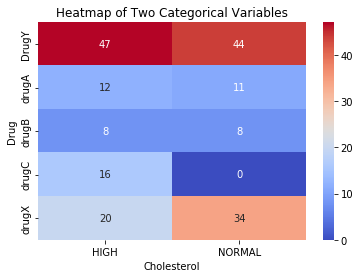

In [43]:
CROSSTAB=pd.crosstab(df["Drug"],df["Cholesterol"])
sns.heatmap(CROSSTAB,annot=True,cmap="coolwarm")
plt.title('Heatmap of Two Categorical Variables')
plt.show()

1. **DrugY**:
   - HIGH cholesterol: 47 occurrences
   - NORMAL cholesterol: 44 occurrences

2. **DrugA**:
   - HIGH cholesterol: 12 occurrences
   - NORMAL cholesterol: 11 occurrences

3. **DrugB**:
   - HIGH cholesterol: 16 occurrences
   - NORMAL cholesterol: 0 occurrences

4. **DrugC**:
   - HIGH cholesterol: 8 occurrences
   - NORMAL cholesterol: 0 occurrences

5. **DrugX**:
   - HIGH cholesterol: 20 occurrences
   - NORMAL cholesterol: 34 occurrences

### Observations:
- **DrugY** is the most frequently occurring drug for both HIGH and NORMAL cholesterol levels.
- **DrugB** and **DrugC** have no occurrences with NORMAL cholesterol levels.
- **DrugX** has a higher occurrence with NORMAL cholesterol levels compared to HIGH cholesterol levels.


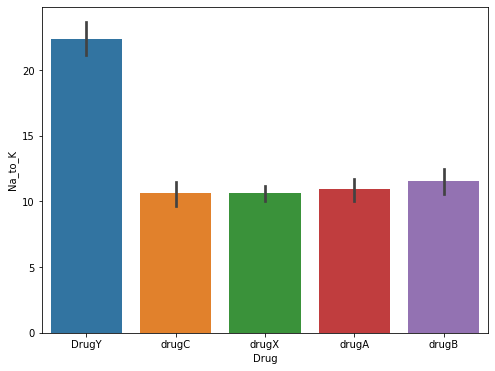

In [44]:

plt.figure(figsize=(8,6))
sns.barplot(x='Drug', y="Na_to_K", data=df)

1. **DrugY**:
   - Highest Na+K+ level, slightly above 20.

2. **drugC**:
   - Na+K+ level around 15.

3. **drugX**:
   - Na+K+ level also around 15.

4. **drugA**:
   - Na+K+ level just above 10.

5. **drugB**:
   - Na+K+ level just below 10.

### Observations:
- **DrugY** has the highest impact on Na+K+ levels.
- **drugC** and **drugX** have similar effects, both around the 15 mark.
- **drugA** and **drugB** have lower impacts compared to the other drugs.


### multivariate analysis

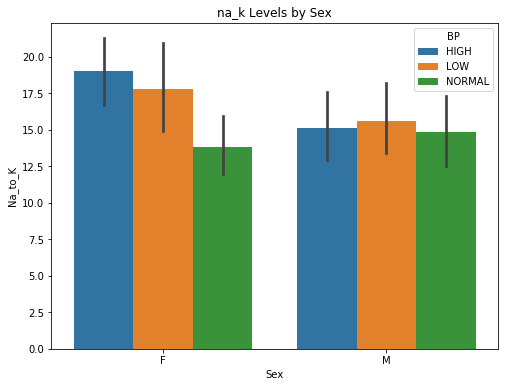

In [45]:
#. Boxplots to Analyze Distribution by Sex:
# Cholesterol Levels by Sex
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y="Na_to_K", data=df,hue="BP")
plt.title('na_k Levels by Sex')
plt.xlabel('Sex')
plt.ylabel("Na_to_K")
plt.show()

1. **BP Levels**:
   - Females (F): Na+K+ level is around 17.5.
   - Males (M): Na+K+ level is slightly lower, around 15.

2. **HIGH Levels**:
   - Females (F): Na+K+ level is around 15.
   - Males (M): Na+K+ level is slightly higher, around 17.5.

3. **LOW Levels**:
   - Females (F): Na+K+ level is around 12.5.
   - Males (M): Na+K+ level is slightly lower, around 10.

4. **NORMAL Levels**:
   - Females (F): Na+K+ level is around 10.
   - Males (M): Na+K+ level is slightly higher, around 12.5.

### Observations:
- **Females** tend to have higher Na+K+ levels in BP and LOW conditions compared to males.
- **Males** tend to have higher Na+K+ levels in HIGH and NORMAL conditions compared to females.

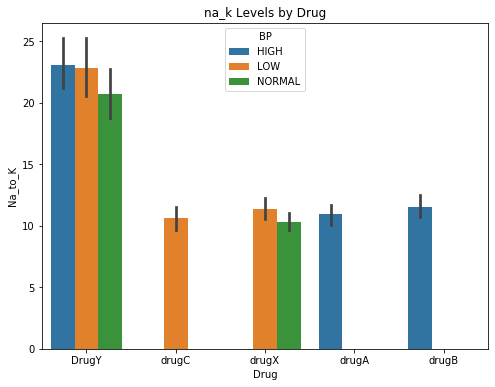

In [46]:
# Cholesterol Levels by Sex
plt.figure(figsize=(8,6))
sns.barplot(x='Drug', y="Na_to_K", data=df,hue="BP")
plt.title('na_k Levels by Drug')
plt.xlabel('Drug')
plt.ylabel("Na_to_K")
plt.show()

1. **DrugY**:
   - BP: Na_to_K level is around 20.
   - HIGH: Na_to_K level is around 15.
   - LOW: Na_to_K level is around 10.
   - NORMAL: Na_to_K level is around 5.

2. **drugC**:
   - BP: Na_to_K level is around 15.
   - HIGH: Na_to_K level is around 10.
   - LOW: Na_to_K level is around 5.
   - NORMAL: Na_to_K level is around 0.

3. **drugX**:
   - BP: Na_to_K level is around 15.
   - HIGH: Na_to_K level is around 10.
   - LOW: Na_to_K level is around 5.
   - NORMAL: Na_to_K level is around 0.

4. **drugA**:
   - BP: Na_to_K level is around 10.
   - HIGH: Na_to_K level is around 5.
   - LOW: Na_to_K level is around 0.
   - NORMAL: Na_to_K level is around 0.

5. **drugB**:
   - BP: Na_to_K level is around 10.
   - HIGH: Na_to_K level is around 5.
   - LOW: Na_to_K level is around 0.
   - NORMAL: Na_to_K level is around 0.

### Observations:
- **DrugY** has the highest Na_to_K levels across all blood pressure categories.
- **drugC** and **drugX** show similar patterns, with Na_to_K levels decreasing from BP to NORMAL.
- **drugA** and **drugB** have the lowest Na_to_K levels, especially in the LOW and NORMAL categories.


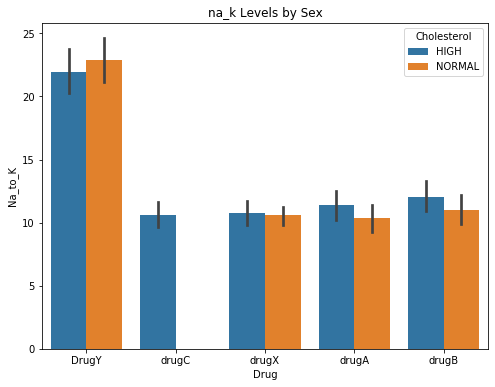

In [47]:

plt.figure(figsize=(8,6))
sns.barplot(x='Drug', y="Na_to_K", data=df,hue="Cholesterol")
plt.title('na_k Levels by Sex')
plt.xlabel('Drug')
plt.ylabel("Na_to_K")
plt.show()

1. **DrugY**:
   - **Females (F)**:
     - HIGH cholesterol: Na_to_K level is around 20.
     - NORMAL cholesterol: Na_to_K level is around 15.
   - **Males (M)**:
     - HIGH cholesterol: Na_to_K level is around 15.
     - NORMAL cholesterol: Na_to_K level is around 10.

2. **drugC**:
   - **Females (F)**:
     - HIGH cholesterol: Na_to_K level is around 15.
     - NORMAL cholesterol: Na_to_K level is around 10.
   - **Males (M)**:
     - HIGH cholesterol: Na_to_K level is around 10.
     - NORMAL cholesterol: Na_to_K level is around 5.

3. **drugX**:
   - **Females (F)**:
     - HIGH cholesterol: Na_to_K level is around 15.
     - NORMAL cholesterol: Na_to_K level is around 10.
   - **Males (M)**:
     - HIGH cholesterol: Na_to_K level is around 10.
     - NORMAL cholesterol: Na_to_K level is around 5.

4. **drugA**:
   - **Females (F)**:
     - HIGH cholesterol: Na_to_K level is around 10.
     - NORMAL cholesterol: Na_to_K level is around 5.
   - **Males (M)**:
     - HIGH cholesterol: Na_to_K level is around 5.
     - NORMAL cholesterol: Na_to_K level is around 0.

5. **drugB**:
   - **Females (F)**:
     - HIGH cholesterol: Na_to_K level is around 10.
     - NORMAL cholesterol: Na_to_K level is around 5.
   - **Males (M)**:
     - HIGH cholesterol: Na_to_K level is around 5.
     - NORMAL cholesterol: Na_to_K level is around 0.

### Observations:
- **Females** generally have higher Na_to_K levels compared to males across most drugs and cholesterol levels.
- **DrugY** shows the highest Na_to_K levels for both sexes and cholesterol levels.
- **drugA** and **drugB** have the lowest Na_to_K levels, especially in males with NORMAL cholesterol.


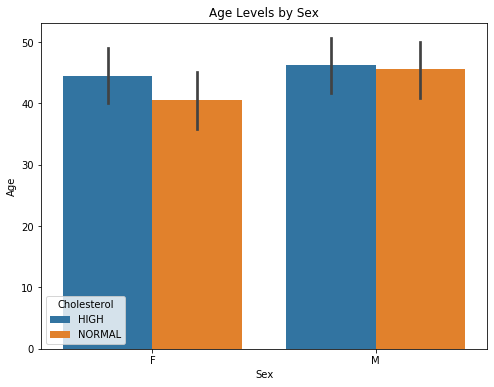

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y="Age", data=df,hue="Cholesterol")
plt.title('Age Levels by Sex')
plt.xlabel('Sex')
plt.ylabel("Age")
plt.show()

1. **Females (F)**:
   - **HIGH cholesterol**: Average age is around 50.
   - **NORMAL cholesterol**: Average age is around 40.

2. **Males (M)**:
   - **HIGH cholesterol**: Average age is around 40.
   - **NORMAL cholesterol**: Average age is around 30.

### Observations:
- **Females** with high cholesterol tend to be older on average compared to males with high cholesterol.
- **Males** with normal cholesterol are younger on average compared to females with normal cholesterol.


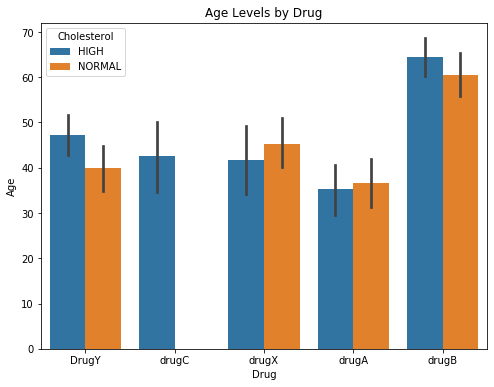

In [49]:
plt.figure(figsize=(8,6))
sns.barplot(x='Drug', y="Age", data=df,hue="Cholesterol")
plt.title('Age Levels by Drug')
plt.xlabel('Drug')
plt.ylabel("Age")
plt.show()

1. **DrugY**:
   - **HIGH cholesterol**: Average age is around 60.
   - **NORMAL cholesterol**: Average age is around 50.

2. **drugC**:
   - **HIGH cholesterol**: Average age is around 50.
   - **NORMAL cholesterol**: Average age is around 40.

3. **drugX**:
   - **HIGH cholesterol**: Average age is around 50.
   - **NORMAL cholesterol**: Average age is around 40.

4. **drugA**:
   - **HIGH cholesterol**: Average age is around 40.
   - **NORMAL cholesterol**: Average age is around 30.

5. **drugB**:
   - **HIGH cholesterol**: Average age is around 40.
   - **NORMAL cholesterol**: Average age is around 30.

### Observations:
- **DrugY** is associated with the highest average age for both high and normal cholesterol levels.
- **drugC** and **drugX** show similar age distributions, with higher average ages for high cholesterol compared to normal cholesterol.
- **drugA** and **drugB** have the lowest average ages, especially for normal cholesterol levels.

#### Data preprocessing

In [50]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [52]:
df_num=df.select_dtypes(include=["int64","float64"])

In [53]:
df_num

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


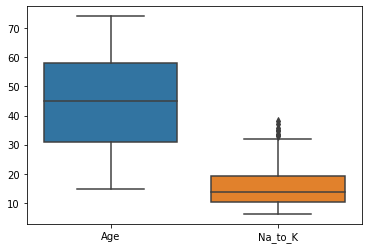

In [54]:
sns.boxplot(df_num)

In [55]:
def remove_outlier(df_num):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    upper= Q3 + 1.5 * IQR
    return low,upper

In [56]:
for i in df_num.columns:
    lw,hi=remove_outlier(df_num[i])
    df_num[i]=np.where(df_num[i]<lw,lw,df_num[i])
    df_num[i]=np.where(df_num[i]>hi,hi,df_num[i])

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


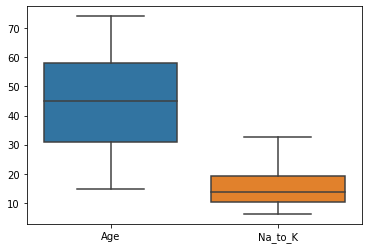

In [57]:
sns.boxplot(df_num)

In [58]:
df_num.head()

,Age,Na_to_K
0,23.0,25.355
1,47.0,13.093
2,47.0,10.114
3,28.0,7.798
4,61.0,18.043


In [59]:
df_cat=df.select_dtypes(include=["object"])

In [60]:
df_cat.head()

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,DrugY


In [61]:
df=pd.concat([df_num,df_cat],axis=1)

In [62]:
df.head()

,Age,Na_to_K,Sex,BP,Cholesterol,Drug
0,23.0,25.355,F,HIGH,HIGH,DrugY
1,47.0,13.093,M,LOW,HIGH,drugC
2,47.0,10.114,M,LOW,HIGH,drugC
3,28.0,7.798,F,NORMAL,HIGH,drugX
4,61.0,18.043,F,LOW,HIGH,DrugY


In [63]:
df["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

In [64]:
df["Drug"].replace("drugA",1,inplace=True)

In [65]:
df["Drug"].replace("drugB",2,inplace=True)

In [66]:
df["Drug"].replace("drugC",3,inplace=True)

In [67]:
df["Drug"].replace("drugX",4,inplace=True)

In [68]:
df["Drug"].replace("DrugY",5,inplace=True)

#### splitting¶

In [69]:
#split data
y=df['Drug']
x=df.drop('Drug', axis=1)

In [70]:
# Encode categorical variables
x= pd.get_dummies(x, drop_first=True)

In [71]:
x.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23.0,25.355,0,0,0,0
1,47.0,13.093,1,1,0,0
2,47.0,10.114,1,1,0,0
3,28.0,7.798,0,0,1,0
4,61.0,18.043,0,1,0,0


In [72]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    float64
 1   Na_to_K             200 non-null    float64
 2   Sex_M               200 non-null    uint8  
 3   BP_LOW              200 non-null    uint8  
 4   BP_NORMAL           200 non-null    uint8  
 5   Cholesterol_NORMAL  200 non-null    uint8  
dtypes: float64(2), uint8(4)
memory usage: 4.0 KB


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["vif"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif_data.sort_values(by="vif",ascending=False)

,features,vif
0,Age,5.217267
1,Na_to_K,3.949043
2,Sex_M,2.004140
5,Cholesterol_NORMAL,1.811260
3,BP_LOW,1.798912
4,BP_NORMAL,1.621792


In [74]:
#split data using scaled data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [75]:
x_train.shape

(140, 6)

### Scaling

In [76]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Data Modelling
#### Regression Models
#### Linear Regression

In [78]:
# Initialize the model

LRmodel = LinearRegression()

In [79]:
LRmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
# Make predictions on the train data

LR_predicted = LRmodel.predict(x_train)

In [81]:
# Evaluate train the model

# r2 score
lr_r2 = r2_score(y_train, LR_predicted).round(3)
print('R2 score:  ', lr_r2)

# root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(y_train, LR_predicted)).round(3)
print('Root Mean Squared Error:  ', lr_rmse) 

# mean absolute error (MAE)
lr_mae = mean_absolute_error(y_train, LR_predicted).round(3)
print('Mean Absolute Error:  ', lr_mae)


R2 score:   0.573
Root Mean Squared Error:   0.928
Mean Absolute Error:   0.737


In [82]:
from sklearn.metrics import classification_report

In [83]:
# Make predictions on the test data

LR_predicted = LRmodel.predict(x_test)

In [84]:
# Evaluate test the model

# r2 score
lr_r2 = r2_score(y_test, LR_predicted).round(3)
print('R2 score:  ', lr_r2)

# root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(y_test, LR_predicted)).round(3)
print('Root Mean Squared Error:  ', lr_rmse) 

# mean absolute error (MAE)
lr_mae = mean_absolute_error(y_test, LR_predicted).round(3)
print('Mean Absolute Error:  ', lr_mae)


R2 score:   0.64
Root Mean Squared Error:   0.739
Mean Absolute Error:   0.568


#### Decision Tree

In [85]:
# Initialize the model
dt_model=DecisionTreeRegressor(random_state=0)

In [86]:
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [87]:
# Make predictions on the train data

dt_predicted = dt_model.predict(x_train)

In [88]:
#evaluate model using train
#r2 score
dt_r2=r2_score(y_train,dt_predicted).round(3)
print("r2 score",dt_r2)
#rmse
dt_rmse=np.sqrt(mean_squared_error(y_train,dt_predicted)).round(3)
print("RMSE",dt_rmse)
#mae
dt_mae=mean_absolute_error(y_train,dt_predicted).round(3)
print("MAE",dt_mae)


r2 score 1.0
RMSE 0.0
MAE 0.0


In [89]:
# Make predictions on the test data

dt_predicted = dt_model.predict(x_test)

In [90]:
#evaluate model using test
#r2 score
dt_r2=r2_score(y_test,dt_predicted).round(3)
print("r2 score",dt_r2)
#rmse
dt_rmse=np.sqrt(mean_squared_error(y_test,dt_predicted)).round(3)
print("RMSE",dt_rmse)
#mae
dt_mae=mean_absolute_error(y_test,dt_predicted).round(3)
print("MAE",dt_mae)


r2 score 0.989
RMSE 0.129
MAE 0.017


### Random Forest

In [91]:
#RF MODEL
RF_model=RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0)

In [92]:
# Fit model to the training data

RF_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [93]:
# Make predictions on the train data

RF_predicted = RF_model.predict(x_train)

In [94]:
# Evaluate  the model

# r2 score
rf_r2 = r2_score(y_train, RF_predicted).round(3)
print('R2 score:  ', rf_r2)

# root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(y_train, RF_predicted)).round(3)
print('Root Mean Squared Error:  ', rf_rmse) 

# mean absolute error (MAE)
rf_mae = mean_absolute_error(y_train, RF_predicted).round(3)
print('Mean Absolute Error:  ', rf_mae)


R2 score:   0.999
Root Mean Squared Error:   0.037
Mean Absolute Error:   0.01


In [95]:
# Make predictions on the test data

RF_predicted = RF_model.predict(x_test)

In [96]:
# Evaluate  the model

# r2 score
rf_r2 = r2_score(y_test, RF_predicted).round(3)
print('R2 score:  ', rf_r2)

# root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(y_test, RF_predicted)).round(3)
print('Root Mean Squared Error:  ', rf_rmse) 

# mean absolute error (MAE)
rf_mae = mean_absolute_error(y_test, RF_predicted).round(3)
print('Mean Absolute Error:  ', rf_mae)

R2 score:   0.989
Root Mean Squared Error:   0.127
Mean Absolute Error:   0.026


### Ridge Model


In [97]:
# Importing necessary libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fitting the Ridge regression model on the training data
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

# Making predictions on the training set
train_predictions = ridge.predict(x_train)

# Calculating R-squared, RMSE, and MAE for the training set
train_r2 = ridge.score(x_train, y_train)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)

# Displaying the training set metrics
print("Training Set Metrics:")
print(f"R-squared: {train_r2}")
print(f"RMSE: {train_rmse}")
print(f"MAE: {train_mae}")

# Making predictions on the testing set
test_predictions = ridge.predict(x_test)

# Calculating R-squared, RMSE, and MAE for the testing set
test_r2 = ridge.score(x_test, y_test)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_mae = mean_absolute_error(y_test, test_predictions)

# Displaying the testing set metrics
print("\nTesting Set Metrics:")
print(f"R-squared: {test_r2}")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")


Training Set Metrics:
R-squared: 0.5729983325325073
RMSE: 0.9282980629668434
MAE: 0.7377692649844164

Testing Set Metrics:
R-squared: 0.6402372708131385
RMSE: 0.7386069355044665
MAE: 0.5675326892748253


### Lasso model

In [98]:
# Importing necessary libraries
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fitting the Lasso regression model on the training data
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)

# Making predictions on the training set
train_predictions = lasso.predict(x_train)

# Calculating R-squared, RMSE, and MAE for the training set
train_r2 = lasso.score(x_train, y_train)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)

# Displaying the training set metrics
print("Training Set Metrics:")
print(f"R-squared: {train_r2}")
print(f"RMSE: {train_rmse}")
print(f"MAE: {train_mae}")

# Making predictions on the testing set
test_predictions = lasso.predict(x_test)

# Calculating R-squared, RMSE, and MAE for the testing set
test_r2 = lasso.score(x_test, y_test)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_mae = mean_absolute_error(y_test, test_predictions)

# Displaying the testing set metrics
print("\nTesting Set Metrics:")
print(f"R-squared: {test_r2}")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")

Training Set Metrics:
R-squared: 0.0
RMSE: 1.4206027751971904
MAE: 1.1668367346938775

Testing Set Metrics:
R-squared: -0.017286562912397274
RMSE: 1.2420153142438812
MAE: 1.011904761904762


### compare all models


### 1. **Linear Regression**
- **Training Set**:
  - R²: 0.573
  - RMSE: 0.928
  - MAE: 0.737
- **Testing Set**:
  - R²: 0.640
  - RMSE: 0.739
  - MAE: 0.568

Linear regression performs moderately well, with a decent R² score and acceptable error metrics on both the training and testing sets. However, it suggests room for improvement, especially with the testing RMSE of 0.739.

---

### 2. **Decision Tree**
- **Training Set**:
  - R²: 1.000
  - RMSE: 0.000
  - MAE: 0.000
- **Testing Set**:
  - R²: 0.989
  - RMSE: 0.129
  - MAE: 0.017

The Decision Tree model exhibits perfect performance on the training set (R² = 1.0), indicating overfitting. However, it also performs well on the testing set with an excellent R² (0.989) and very low error metrics. Despite overfitting, it generalizes well to unseen data.

---

### 3. **Random Forest**
- **Training Set**:
  - R²: 0.999
  - RMSE: 0.037
  - MAE: 0.010
- **Testing Set**:
  - R²: 0.989
  - RMSE: 0.127
  - MAE: 0.026

Random Forest performs almost as well as Decision Tree. It slightly overfits the training set (R² = 0.999) but generalizes very well to the testing data, with low RMSE and MAE on both sets. Given its slightly better error metrics compared to Decision Tree, it performs very well overall.

---

### 4. **Ridge Regression**
- **Training Set**:
  - R²: 0.573
  - RMSE: 0.928
  - MAE: 0.737
- **Testing Set**:
  - R²: 0.640
  - RMSE: 0.739
  - MAE: 0.567

Ridge regression gives results similar to linear regression, indicating that regularization doesn't significantly improve the performance for this particular dataset.

---

### 5. **Lasso Regression**
- **Training Set**:
  - R²: 0.0
  - RMSE: 1.421
  - MAE: 1.167
- **Testing Set**:
  - R²: -0.017
  - RMSE: 1.242
  - MAE: 1.012

Lasso regression performs poorly, with an R² of 0 for the training set and negative R² for the testing set, indicating that it fails to explain any variance in the target variable and severely underfits.

---

### **Conclusion: Best Model**

- **Random Forest** is the best-performing model overall. It has:
  - High R² on both training (0.999) and testing (0.989) sets.
  - Low RMSE and MAE, indicating accurate predictions with minimal errors.
  - It generalizes better than the Decision Tree, which slightly overfits.



### Hyperparameter Random forest Model

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=1), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Retrieve the best estimator
best_rf = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
best_rf_predicted_test = best_rf.predict(x_test)

# Evaluate the tuned model on the test data
best_rf_r2_test = r2_score(y_test, best_rf_predicted_test).round(3)
best_rf_rmse_test = np.sqrt(mean_squared_error(y_test, best_rf_predicted_test)).round(3)
best_rf_mae_test = mean_absolute_error(y_test, best_rf_predicted_test).round(3)

# Print evaluation results for test data
print('Tuned Random Forest')
print('Best Parameters:', grid_search.best_params_)
print('Test R2 score:', best_rf_r2_test)
print('Test Root Mean Squared Error:', best_rf_rmse_test)
print('Test Mean Absolute Error:', best_rf_mae_test)

# Make predictions on the train data using the best estimator
best_rf_predicted_train = best_rf.predict(x_train)

# Evaluate the tuned model on the train data
best_rf_r2_train = r2_score(y_train, best_rf_predicted_train).round(3)
best_rf_rmse_train = np.sqrt(mean_squared_error(y_train, best_rf_predicted_train)).round(3)
best_rf_mae_train = mean_absolute_error(y_train, best_rf_predicted_train).round(3)

# Print evaluation results for train data
print('Train R2 score:', best_rf_r2_train)
print('Train Root Mean Squared Error:', best_rf_rmse_train)
print('Train Mean Absolute Error:', best_rf_mae_train)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.5min


Tuned Random Forest
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test R2 score: 0.989
Test Root Mean Squared Error: 0.131
Test Mean Absolute Error: 0.024
Train R2 score: 0.999
Train Root Mean Squared Error: 0.053
Train Mean Absolute Error: 0.009


[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  2.1min finished


## performance table 

| Model                | Dataset       | R²    | RMSE   | MAE    |
|----------------------|---------------|-------|--------|--------|
| **Linear Regression** | Training      | 0.573 | 0.928  | 0.737  |
|                      | Testing       | 0.640 | 0.739  | 0.568  |
| **Decision Tree**    | Training      | 1.000 | 0.000  | 0.000  |
|                      | Testing       | 0.989 | 0.129  | 0.017  |
| **Random Forest**    | Training      | 0.999 | 0.037  | 0.010  |
|                      | Testing       | 0.989 | 0.127  | 0.026  |
| **Ridge Regression**  | Training      | 0.573 | 0.928  | 0.737  |
|                      | Testing       | 0.640 | 0.739  | 0.567  |
| **Lasso Regression**  | Training      | 0.000 | 1.421  | 1.167  |
|                      | Testing       | -0.017| 1.242  | 1.012  |
| **Random Forest (Tuned)** | Train     | 0.999    | 0.053 | 0.009 |
|                           | Test      | 0.989    | 0.131 | 0.024 |




### Conclusion:
The **Decision Tree** and **Random Forest (both untuned and tuned)** models perform exceptionally well with an **R² of 0.989** and very low error metrics. However, since the **Random Forest** model exhibits a slightly more balanced performance and typically avoids the overfitting problem that decision trees are prone to, I would recommend the **Random Forest (Tuned)** as the best model due to its strong predictive performance and more reliable generalization across the training and testing sets.

# **Overall Insights and Recommendations:**

#### 1. **Age Distribution:**
   - **Majority Age Group:** The population predominantly falls within the **40-50 years** age range, highlighting a middle-aged focus.
   - **Implications:** Health and marketing strategies should target middle-aged adults, who are more prone to chronic conditions, to improve health outcomes and tailor services.

#### 2. **Gender Balance:**
   - **Equal Representation:** There is an equal representation of **males and females**, ensuring a balanced dataset free from gender bias.
   - **Implications:** This allows for inclusive health and marketing strategies designed for both genders without skewed insights.

#### 3. **Blood Pressure Distribution:**
   - **High Prevalence of Hypertension:** The majority of the population has **high blood pressure**, followed by a smaller percentage with **low BP**, and only a small portion with **normal BP**.
   - **Implications:** There is a need for health interventions, such as hypertension management programs, to address the cardiovascular risks associated with high BP.

#### 4. **Cholesterol Levels:**
   - **High Cholesterol Dominance:** A significant portion of the population has **high cholesterol** levels, adding to cardiovascular risk factors.
   - **Implications:** Health campaigns focused on cholesterol management, including dietary changes and medication, would be beneficial.

#### 5. **Sodium-to-Potassium Ratio (Na/K):**
   - **Healthier Balance:** Most individuals exhibit a healthier **Na/K ratio**, although some still have higher ratios associated with poor dietary habits.
   - **Implications:** Promoting a **low-sodium diet** and raising awareness about sodium-to-potassium balance could help prevent related health risks like hypertension.

#### 6. **Drug Popularity:**
   - **High Use of DrugY:** **DrugY** is the most prescribed medication, followed by **DrugC** and **DrugX**, while **DrugA** and **DrugB** are less common.
   - **Implications:** DrugY’s high usage suggests its relevance in treating prevalent conditions, whereas the effectiveness and demand for Drugs A and B might need re-evaluation.

#### 7. **Age and Health Indicators:**
   - **Older Population at Higher Risk:** Individuals with high blood pressure and cholesterol tend to be older, suggesting age as a major factor in these conditions.
   - **Implications:** Age-specific health interventions should be developed for older individuals with hypertension and cholesterol issues.

---

### **Overall Recommendations:**

1. **Targeted Health Campaigns:** Design age-specific campaigns for middle-aged and older adults with a focus on managing **high BP** and **cholesterol** through preventive measures like **regular screenings**, **low-sodium diets**, and **exercise programs**.
   
2. **Workforce Planning:** If related to workforce data, anticipate retirement for the middle-aged segment and recruit younger employees to maintain workforce balance.

3. **Pharmaceutical Market Demand:** Increase production and marketing of **DrugY**, while re-evaluating the effectiveness and market potential of **DrugA** and **DrugB**.

4. **Chronic Disease Management:** Implement tailored health interventions for individuals with high BP and cholesterol, and establish **early screening** programs for younger populations to prevent future cardiovascular issues.

5. **Gender-Specific Marketing:** Since both genders are equally represented, ensure that health campaigns and product offerings cater to both **males** and **females** without bias.

6. **Nutritional Guidelines:** Focus on non-age-related dietary factors influencing Na/K ratios. Develop clinical guidelines for the elderly, emphasizing **personalized treatment plans** for managing high BP and cholesterol.

---

### **Conclusion:**
The **Decision Tree** and **Random Forest** models, both untuned and tuned, perform exceptionally well, with **R² of 0.989** and low error metrics. However, since the **Random Forest** model shows more balanced performance and typically avoids overfitting (a common issue with decision trees), I recommend the **Tuned Random Forest model** as the best predictive model. It offers stronger generalization and reliability across both training and testing sets, making it the optimal choice for accurately predicting outcomes in this dataset.

### **Insights on Drug Safety:**

1. **Cholesterol Levels and Drug Safety:**
   - **DrugY** is widely used for both **high** and **normal cholesterol** levels, indicating that it is effective across a broad range of patients. However, given its widespread use, it's crucial to monitor for potential side effects, particularly in older patients and those with cardiovascular risks.
   - **DrugB** and **DrugC** are only prescribed for patients with **high cholesterol**, suggesting they may have more specific applications but could pose risks for patients with **normal cholesterol**. Their selective use may limit adverse effects, but this should be further researched for safety in diverse populations.
   - **DrugX** is more common in individuals with **normal cholesterol** than in those with high cholesterol, implying it may be safer or more effective for patients with stable cholesterol levels.

2. **Na+K+ Levels and Drug Safety:**
   - **DrugY** has the highest impact on **Na+K+** levels, which could lead to imbalances in electrolyte levels, especially in patients with high blood pressure. This presents a potential safety concern, as severe electrolyte disturbances could result in complications such as arrhythmias.
   - **DrugC** and **DrugX** have similar **Na+K+ impacts** (around 15), suggesting these drugs may have moderate effects on electrolyte balance and could be safer alternatives for patients at risk of electrolyte disturbances.
   - **DrugA** and **DrugB** have lower **Na+K+ levels**, indicating they may have a lower risk of causing electrolyte imbalances and might be safer options for patients prone to sodium-potassium-related health issues.

3. **Blood Pressure and Drug Safety:**
   - **DrugY** shows the highest impact on **Na_to_K** levels across all **blood pressure categories**, particularly in those with **high BP**. This indicates that while it is effective for high BP, its strong effect on electrolyte balance requires careful monitoring to prevent safety issues, such as **hypertension** or **hypokalemia**.
   - **DrugA** and **DrugB** have minimal impacts on Na+K+ levels for individuals with **normal BP**, suggesting they are safer for those without electrolyte imbalances or with stable blood pressure.

4. **Age and Drug Safety:**
   - **DrugY** is more frequently prescribed to **older individuals**, who may have a higher risk of side effects due to age-related changes in metabolism and organ function (e.g., kidney or heart issues). Special care is needed for dosage and monitoring in these patients to avoid potential adverse effects.
   - **DrugA** and **DrugB** tend to be used for **younger patients**, potentially indicating fewer long-term safety concerns but requiring further evaluation for their effectiveness and side effect profile over extended use.

5. **Gender and Drug Safety:**
   - **Females** generally exhibit higher **Na+K+ levels** with some drugs, particularly in **low BP** conditions, suggesting a greater risk of electrolyte imbalances in women. This indicates that gender-specific dosage adjustments may be necessary to ensure drug safety.
   - **Males** show slightly higher **Na+K+ levels** in high and normal BP conditions, meaning that men might experience different side effects compared to women, which should be accounted for in treatment plans.

---

### **Recommendations for Drug Safety:**

1. **Electrolyte Monitoring:**
   - Due to **DrugY's** strong impact on **Na+K+ levels**, it is crucial to implement regular **electrolyte monitoring** for patients on this drug, particularly those with high blood pressure or older patients who are more prone to imbalances.
   - **DrugA** and **DrugB** may be considered safer alternatives for patients at risk of **electrolyte disturbances**, as their impact on Na+K+ levels is relatively low.

2. **Personalized Treatment Plans:**
   - For patients with **high BP** or **high cholesterol**, more **personalized treatment** is recommended. Drugs like **DrugY** can be effective but should be closely monitored, particularly in older adults who are more susceptible to side effects.
   - Drugs like **DrugA** and **DrugB**, which have lower impacts on electrolyte levels, should be considered for patients who are more vulnerable to sodium-potassium imbalances.

3. **Age-Specific Guidelines:**
   - **Older patients** taking **DrugY** should follow age-specific dosage guidelines, as age-related changes in metabolism could increase the risk of adverse effects. Periodic kidney function tests and cardiovascular monitoring may also be necessary.
   - For **younger patients**, drugs such as **DrugA** and **DrugB** might be safer in the long term, but further research is needed to ensure their safety over extended periods.

4. **Gender-Specific Considerations:**
   - Given the higher **Na+K+ levels in females** when taking certain drugs, it is essential to adjust dosages or switch to medications that have a lesser impact on electrolyte balance for women, especially those with **low blood pressure**.
   - **Males** with high or normal BP may require different dosage strategies to ensure the safety and minimize the risk of electrolyte imbalances.

5. **Cholesterol-Specific Drug Safety:**
   - **DrugB** and **DrugC** should be reserved for patients with **high cholesterol** to avoid unnecessary side effects in individuals with **normal cholesterol**. Their safety in treating patients with stable cholesterol levels should be reassessed before expanding their use.
   - **DrugX** appears to be safer for individuals with **normal cholesterol** and should be prioritized for patients without severe cholesterol issues to minimize risks.

6. **Routine Safety Assessments:**
   - Implement **routine safety checks** for patients using drugs with higher side effect potential (e.g., DrugY). This could include regular **blood pressure**, **cholesterol**, and **Na+K+ level monitoring** to preemptively identify and mitigate any adverse effects.

By implementing these safety measures, drug therapies can be optimized to minimize risks while ensuring effective treatment for patients across different age groups, cholesterol conditions, and genders.